In [65]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
data_path = 'bike-sharing-dataset/hour.csv'

rides = pd.read_csv(data_path)

In [67]:
rides.shape

(17379, 17)

In [68]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [69]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [70]:
#check the total rents in each month
rides_1=rides[['casual','registered','cnt','mnth']].groupby('mnth').sum()
print(rides_1)

      casual  registered     cnt
mnth                            
1      12042      122891  134933
2      14963      136389  151352
3      44444      184476  228920
4      60802      208292  269094
5      75285      256401  331686
6      73906      272436  346342
7      78157      266791  344948
8      72039      279155  351194
9      70323      275668  345991
10     59760      262592  322352
11     36603      218228  254831
12     21693      189343  211036


Text(0.5,1,'total Retal counts in each month')

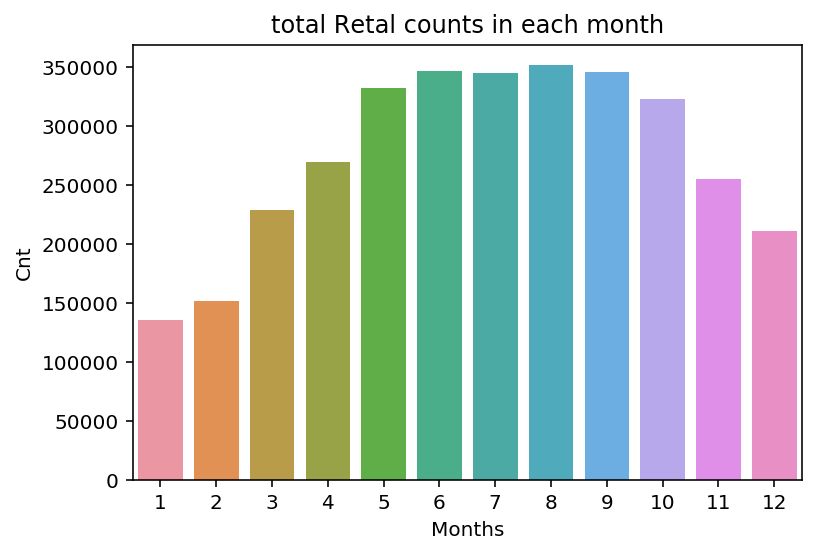

In [71]:
import seaborn as sns
x=np.array(rides_1.index)
fig=sns.barplot(x,rides_1.cnt)
fig.set(xlabel='Months', ylabel='Cnt')
plt.title("total Retal counts in each month")


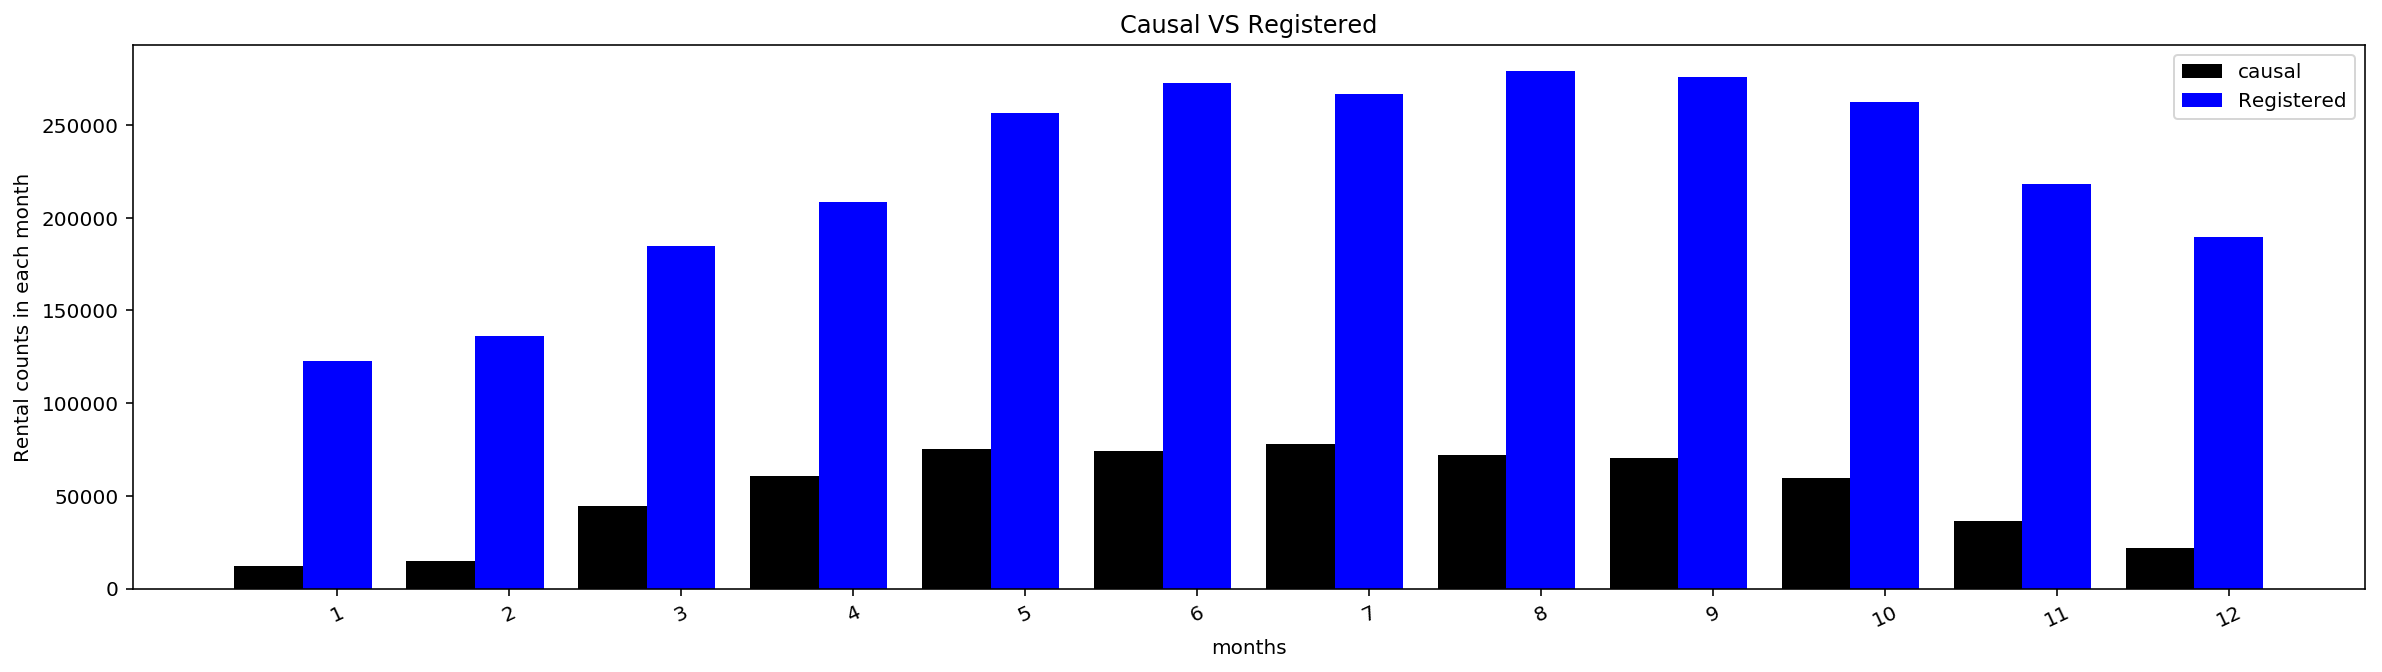

In [72]:
# necessary variables                                                          
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
                           
width = 0.4                     # the width of the bars                         
## the bars                                                                     
rects1 = ax.bar(x, rides_1.casual, width,
                color='black',
                error_kw=dict(elinewidth=2,ecolor='blue'))

rects2 = ax.bar(x+width, rides_1.registered, width,
                    color='blue',
                error_kw=dict(elinewidth=2,ecolor='black'))
                                                              
ax.set_xlabel('months')
ax.set_ylabel('Rental counts in each month')
ax.set_title('Causal VS Registered')
xTickMarks = rides_1.index                 
ax.set_xticks(x+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=25, fontsize=10)

## add a legend                                                                 
ax.legend( (rects1[0], rects2[0]), ('causal', 'Registered') )
plt.show()

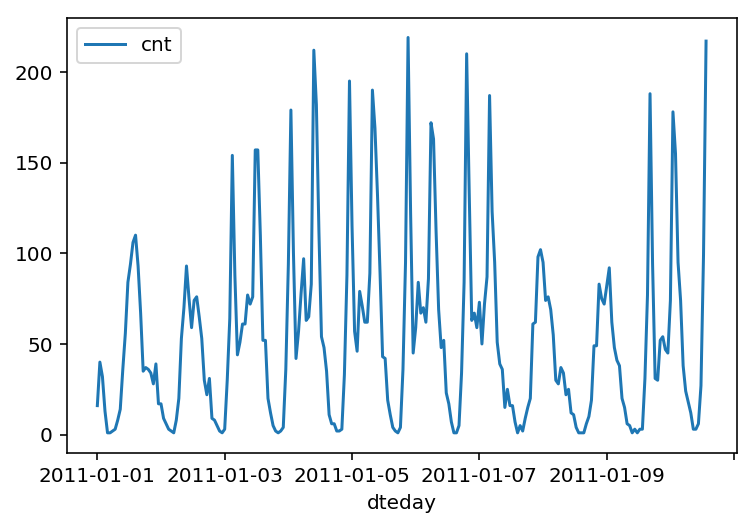

In [73]:
# plot the capacity of first 9 days 
rides[:24*10].plot(x='dteday', y='cnt')

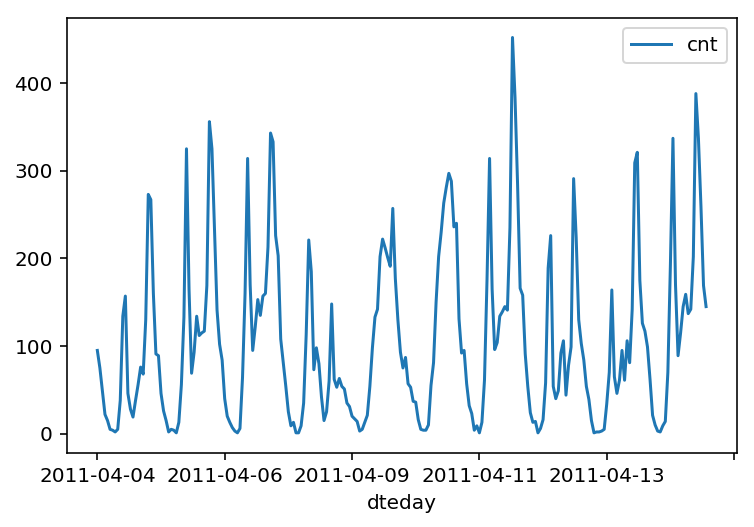

In [74]:
# plot  the capacity from day 90 to day 99
rides[24*90:24*100].plot(x='dteday', y='cnt')

In [75]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)
#rides.shape
rides.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [76]:
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)

In [77]:
#standardize each of the continuous variables
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [78]:
# Save the last 21 days as test data
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [79]:
#cross validation
n_records = features.shape[0]
split = np.random.choice(features.index, 
                         size=int(n_records*0.8), 
                         replace=False)
train_features, train_targets = features.loc[split], targets.loc[split]
val_features, val_targets = features.drop(split), targets.drop(split)

In [80]:
#build the neural network
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
       
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

       
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                                (self.hidden_nodes, self.input_nodes))
    
        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.output_nodes, self.hidden_nodes))
        
        self.learning_rate = learning_rate
        
        
        self.activation_function = sigmoidFunction
    
    def train(self, inputs_list, targets_list):
        
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin = 2).T
#        print(targets.shape)
 
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs = final_inputs
        
     
        ### Backward pass ###
        
        # TODO: Output error
        output_errors = targets - final_outputs # Output layer error is the difference between desired target and actual output.
        
        # TODO: Backpropagated error
        hidden_errors = output_errors * self.weights_hidden_to_output * 1.0 # errors propagated to the hidden layer
        hidden_grad = np.dot(hidden_errors.T * hidden_outputs * (1 - hidden_outputs), inputs.T) # hidden layer gradients
    #    hidden_grad = np.dot(hidden_errors * hidden_outputs * (1 - hidden_outputs), inputs.T) # hidden layer gradients
#        print(hidden_errors.T.shape,hidden_outputs.shape)
#        print((1 - hidden_outputs).shape,inputs.T.shape)
#        print(output_errors.shape, self.weights_hidden_to_output.shape,hidden_grad.shape)
        
        # TODO: Update the weights
        grad_out = np.dot(hidden_outputs, output_errors * 1.0)
        self.weights_hidden_to_output += self.learning_rate * grad_out.T / inputs.shape[1] # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.learning_rate * hidden_grad / inputs.shape[1] # update input-to-hidden weights with gradient descent step
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs

In [81]:
def MSE(y, Y):
    return np.mean((y-Y)**2)
def sigmoidFunction(x):
    return 1 / (1 + np.exp(-x))

In [83]:
### Set the hyperparameters here ###
epochs = 1000
learning_rate = 0.1
hidden_nodes = 10
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    if e%(epochs/10) == 0:
        # Calculate losses for the training and test sets
        train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
        val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
        losses['train'].append(train_loss)
        losses['validation'].append(val_loss)
        
        # Print out the losses as the network is training
        print('Training loss:',train_loss)
        print('Validation loss:',val_loss)

Training loss: 1.1207764977309642
Validation loss: 1.1272715472465096
Training loss: 0.19874616091268543
Validation loss: 0.21101414004428995
Training loss: 0.16139678912993236
Validation loss: 0.1686272427904807
Training loss: 0.08059462284740578
Validation loss: 0.09164650327854623
Training loss: 0.07283281946954209
Validation loss: 0.0836807128438005
Training loss: 0.07483976012800361
Validation loss: 0.08523596104398459
Training loss: 0.08468821222401372
Validation loss: 0.09269646625792982
Training loss: 0.07084156703277042
Validation loss: 0.08298028024094067
Training loss: 0.07397214432862409
Validation loss: 0.08547924110647825
Training loss: 0.06766898885369063
Validation loss: 0.07639956622870438


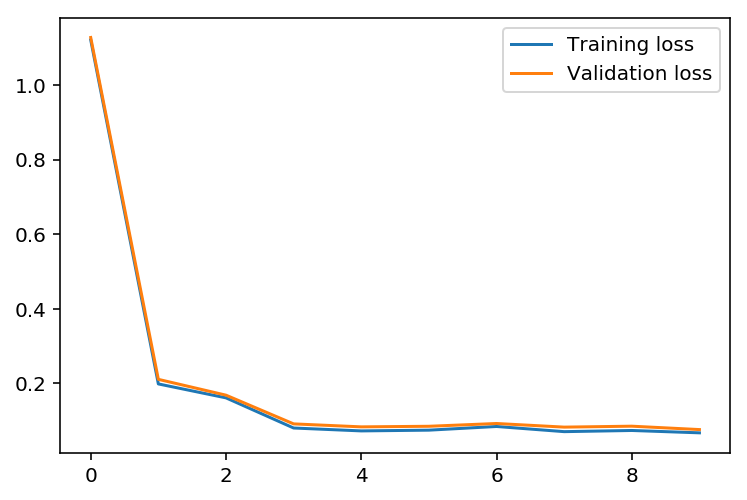

In [84]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.savefig('hidden1_1.png')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


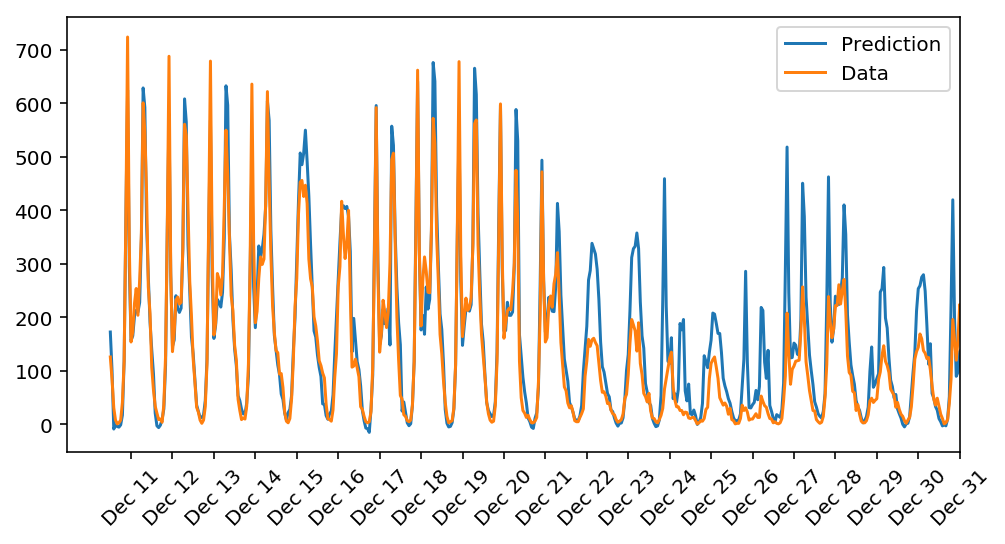

In [85]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)
plt.savefig('hidden1_2.png')

In [87]:
### Set the hyperparameters here ###
epochs = 1000
learning_rate = 0.05
hidden1_nodes = 10
hidden2_nodes = 5
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork2(N_i, hidden1_nodes, hidden2_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):
        network.train(record, target)
    
    if e%(epochs/10) == 0:
        # Calculate losses for the training and test sets
        train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
        val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
        losses['train'].append(train_loss)
        losses['validation'].append(val_loss)

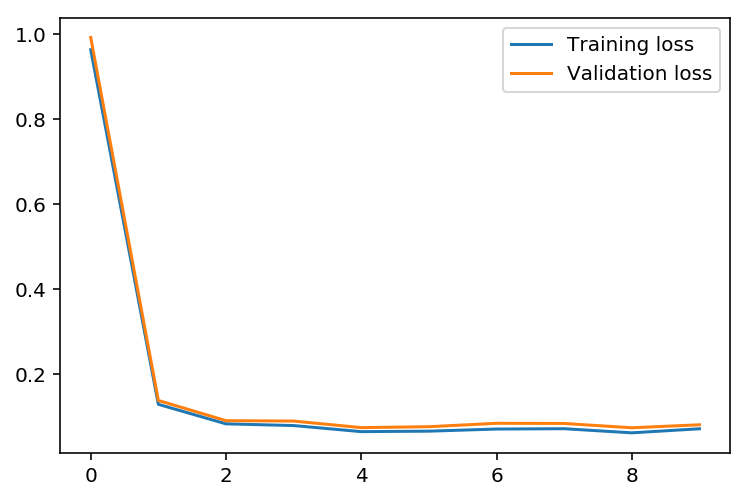

In [88]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.savefig('hidden2_1.png')

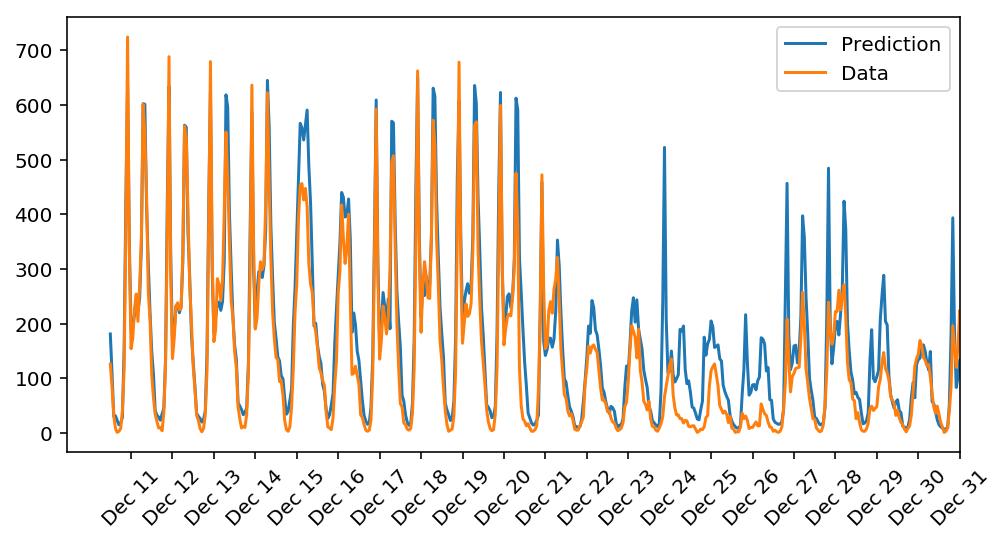

In [89]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)
plt.savefig('hidden2_2')